# 1 Importanto os módulos

In [1]:
# Pandas para a análise, manipulação e visualização dos dados
import pandas as pd

# Numpy para manipução dos dados
import numpy as np

# Seaborn e Matplotlib para geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Os para a acessar os diretórios do sistema
import os

# Salva variável em forma de conjunto de dados
from joblib import dump, load

# 2 Estrutura dos dados

Esse dataset está no formato CSV e contém as informações sobre clientes de uma instituição financeira. Estamos interessados em explicar o default, que indica se um cliente é adimplente (default = 0) ou inadimplente (default = 1) ou seja, queremos entender o motivo de um cliente deixar de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está a seguir.

In [2]:
# Importando o nome do arquivo Python_M10_support material.csv
nome_arquivo_csv = os.listdir()[1]

# Importando o arquivo .csv para a Python com Pandas
df = pd.read_csv(nome_arquivo_csv)
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [3]:
# Analisando as informações contidas nas colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

Descrição das variáveis

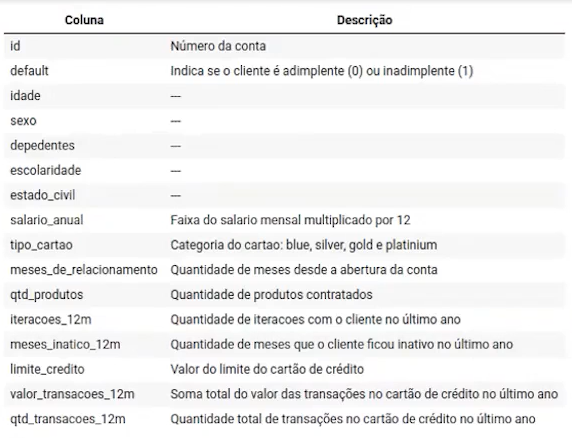

## 2.1 Corrigindo dados faltantes

Observamos com .info() que todas as variáveis possuem o mesmo número de entradas, o que é importante. Porém, essa informação está errada pois sabemos que algumas das entradas com a informação "na" são na verdade dados faltantes. Por isso, vamos converter todos os "na" em NuN (np.nan).

In [4]:
'''
  Laço que itera os nomes das colunas, que serão usadas para selecionar as
  variáveis e convereter, na função lambda, "na" para NuN (np.nan).
'''
for coluna in df.columns:
  df[coluna] = df[coluna].apply(lambda valor: np.nan if valor == "na" else valor)

df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

Com isso observamos que as variáveis abaixo tem menos entradas que as demais colunas:
- escolaridade
- estado_civil
- salario_anual

In [6]:
'''
  Analisando a porcentagem de cobertura dos dados no banco,
  em cada um das variáveis que contém dados faltando
'''
num_escolaridade = df["escolaridade"].notna().sum() / len(df)
num_estado_civil = df["estado_civil"].notna().sum() / len(df)
num_salario_anual = df["salario_anual"].notna().sum() / len(df)

print(f"Escolaridade: {num_escolaridade * 100:.2f}%")
print(f"Estado civil: {num_estado_civil * 100:.2f}%")
print(f"Salario anual: {num_salario_anual * 100:.2f}%")

Escolaridade: 85.00%
Estado civil: 92.60%
Salario anual: 89.02%


In [7]:
print(f"Porcentagem de perda, eliminando os dados faltantes: {round((len(df.dropna()) / len(df) - 1) * -100, 2)}%")

Porcentagem de perda, eliminando os dados faltantes: 30.08%


Observamos que a variável com menos dados têm 85% de cobertura do número total de entradas. Entendemos que essa porcentagem pode ser significativa, por isso não vamos apenas remover do conjunto de dados as instâncias faltantes, o que acarretaria em uma perda de aproximadamente 30%.


Para equalizar essa condição, iremos **substituir os valores faltando pelas cotegorias já existentens, observando a mesma proporção**.

In [8]:
# Frequência das categorias na variável escolaridade
round((df['escolaridade'].value_counts(normalize=True)), 2)

mestrado               0.36
ensino medio           0.23
sem educacao formal    0.17
graduacao              0.12
doutorado              0.11
Name: escolaridade, dtype: float64

In [9]:
def completa_na_por_frequencia(df: pd.DataFrame, coluna: str) -> pd.DataFrame|str:
  '''
    Função que completa os valores faltantes de uma variável de uma DataFrame
    por valores já presentes na variável, obdesendo a proporção entre eles.
    :param df (pd.DataFrame): DataFrame contendo os dados;
    :param coluna (str): Nome da variável contendo NuN;
    :return df (pd.DataFrame): DataFrame com os dados substituídos;
  '''
  try:
    # Variável que recebe a frequência relativa e o nome das categorias
    data_transforme = df[coluna].value_counts(normalize=True)

    # Número de NuN
    n_amostras = len(df) - len(df[coluna].dropna())

    # Série que é formada pela escolha randômica, usando numpy, das categorias
    categorias = pd.Series(
        data=np.random.choice(
            data_transforme.index,
            p=data_transforme.values,
            size=n_amostras
        ),
        index=df[df[coluna].isna()].index
    )

    # Substituição do NuN pelas categorias
    df.loc[categorias.index, coluna] = categorias.values
    return df
  except Exception as erro:
    return erro

In [10]:
df = completa_na_por_frequencia(df=df, coluna="escolaridade")
df = completa_na_por_frequencia(df=df, coluna="estado_civil")
df = completa_na_por_frequencia(df=df, coluna="salario_anual")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [11]:
# Frequência das categorias na variável escolaridade
round((df['escolaridade'].value_counts(normalize=True)), 2)

mestrado               0.37
ensino medio           0.23
sem educacao formal    0.17
graduacao              0.12
doutorado              0.11
Name: escolaridade, dtype: float64

In [12]:
'''
  Analisando a porcentagem de cobertura dos dados no banco,
  em cada um das variáveis que contém dados faltando
'''
num_escolaridade = df["escolaridade"].notna().sum() / len(df)
num_estado_civil = df["estado_civil"].notna().sum() / len(df)
num_salario_anual = df["salario_anual"].notna().sum() / len(df)

print(f"Escolaridade: {num_escolaridade * 100:.2f}%")
print(f"Estado civil: {num_estado_civil * 100:.2f}%")
print(f"Salario anual: {num_salario_anual * 100:.2f}%")

Escolaridade: 100.00%
Estado civil: 100.00%
Salario anual: 100.00%


### Conclusão 1

Foi observado que no conjunto de dados, alguns valores estavam faltando. A simples retirada levaria a uma perda de ~30% dos dados, o que julgamos inadequado.

Foi resolvido substituir os valores faltantes pelas mesmas categorias já presentes no conjunto de dados, obdesendo a frequência relativa na variável.

Assim, foi obtido um conjunto de dados sem valores faltantes.

## 2.2 Tipificação das variáveis

In [13]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Algumas das variáveis não correspondem com as classes (tipos) dos dados usados para armazenar a informação na DataFrame. As variáveis abaixo deveriam ser *category*:

- sexo
- escolaridade
- estado_civil
- salario_anual
- tipo_cartao

As variáveis abaixo deveriam ser *float*:
- limite_credito
- valor_transacoes_12m

Além disso, a variável dependente **default**, que indica adimplencia ou inadimplencia, deveria ser *bool*.

In [14]:
# Instanciando uma dicionário com as colunas e as novas classes da DataFrame
novos_tipos = {
    "default":       "bool",
    "sexo":          "category",
    "escolaridade":  "category",
    "estado_civil":  "category",
    "salario_anual": "category",
    "tipo_cartao":   "category",
}
novos_tipos

{'default': 'bool',
 'sexo': 'category',
 'escolaridade': 'category',
 'estado_civil': 'category',
 'salario_anual': 'category',
 'tipo_cartao': 'category'}

In [15]:
# Convertendo para as novas classes usando dicionário
df = df.astype(novos_tipos)

# Convertendo as colunas para float
funcao_convert = lambda x: float(x.replace(".","").replace(",","."))
df["limite_credito"] = df["limite_credito"].apply(funcao_convert)
df["valor_transacoes_12m"] = df["valor_transacoes_12m"].apply(funcao_convert)
df.dtypes

id                            int64
default                        bool
idade                         int64
sexo                       category
dependentes                   int64
escolaridade               category
estado_civil               category
salario_anual              category
tipo_cartao                category
meses_de_relacionamento       int64
qtd_produtos                  int64
iteracoes_12m                 int64
meses_inativo_12m             int64
limite_credito              float64
valor_transacoes_12m        float64
qtd_transacoes_12m            int64
dtype: object

In [16]:
df.select_dtypes(include=['int64', "float64"]).head()

,id,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,45,3,39,5,3,1,12691.51,1144.90,42
1,818770008,49,5,44,6,2,1,8256.96,1291.45,33
2,713982108,51,3,36,4,0,1,3418.56,1887.72,20
3,769911858,40,4,34,3,1,4,3313.03,1171.56,20
4,709106358,40,3,21,5,0,1,4716.22,816.08,28


In [17]:
df.select_dtypes(exclude=['int64', "float64"]).head()

,default,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,False,M,ensino medio,casado,$60K - $80K,blue
1,False,F,mestrado,solteiro,menos que $40K,blue
2,False,M,mestrado,casado,$80K - $120K,blue
3,False,F,ensino medio,solteiro,menos que $40K,blue
4,False,M,sem educacao formal,casado,$60K - $80K,blue


### Conclusão 1


O conjunto de dados apresentava algumas colunas que continham informações que não condiziam com a classe (tipo) de variável.

Foram substituídos pelas classes mais propícias por variável.

## 2.3 Salvamento de dados estruturados

Para trabalhos futuros, optamos por salvar em disco a DataFrame já estruturada.

In [18]:
dump(df, "df_2024-02-09")

['df_2024-02-09']

# 3 Análise dos dados

Importanto dados estruturados

In [19]:
# Importando conjunto de dados estruturado
df = load('df_2024-02-09')

## 3.1 Variáveis quantitativas

In [20]:
# Medidas resumo das variáveis quantitativas
include = ['int64', "float64"]

df.iloc[:,1:].select_dtypes(include=include).describe().T

,count,mean,std,min,25%,50%,75%,max
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Buscando-se os valores das variáveis quantitativas com a variável dependente, iremos plotar graficos de barra para todas as colunas.

In [21]:
def grafico_barras_quantitativo(
    df: pd.DataFrame,
    y: str,
    linha: int,
    coluna: int,
    title: str,
    xlabel: str,
    ylabel: str,
  ):
  '''
    Gera uma imagem de gráfico de barras.
    :param df (pd.DataFrame): DataFrame contendo o conjunto de dados
    :param y (str): Nome da coluna para o eixo y
    :param linha (int): Coordenada da linha no subplote.
    :param coluna (int): Coordenada da coluna no subplote.
    :param title (str): Título do gráfico no subplote.
    :param xlabel (str): Legenda no eixo x do gráfico no subplote.
    :param ylabel (str): Legenda no eixo y do gráfico no subplote.
    :return f (plt.axis): Retorna um eixo de uma figura com subplotes
  '''
  f = sns.barplot(
      palette="Paired",
      y=y,
      hue=df['default'].apply(lambda x: 'Inadimplentes' if x else 'Adimplentes'),
      data=df,
      ax=eixos[linha][coluna]
  )

  f.set(
      title=title,
      xlabel=xlabel,
      ylabel=ylabel,
  )
  return f

In [22]:
# Objeto que contêm o nome das variáveis quantitativas
colunas_quantitativas = df.iloc[:,1:].select_dtypes(include=include).columns
colunas_quantitativas

Index(['idade', 'dependentes', 'meses_de_relacionamento', 'qtd_produtos',
       'iteracoes_12m', 'meses_inativo_12m', 'limite_credito',
       'valor_transacoes_12m', 'qtd_transacoes_12m'],
      dtype='object')

In [23]:
# Lista com dicionários contendo as informações para serem inseridas no gráfico
variavveis_para_grafico = [
    {
      "df":    df,
      'y':     colunas_quantitativas[0],
      'linha':  0,
      'coluna': 0,
      'title': 'Idade',
      'xlabel': colunas_quantitativas[0],
      'ylabel': 'Idades em Anos'
    },
    {
      "df":    df,
      'y':     colunas_quantitativas[1],
      'linha':  0,
      'coluna': 1,
      'title': 'Dependentes',
      'xlabel': colunas_quantitativas[1],
      'ylabel': 'Número de Dependentes'
    },
    {
      "df":    df,
      'y':     colunas_quantitativas[2],
      'linha':  0,
      'coluna': 2,
      'title': 'Meses de Relacionamento',
      'xlabel': colunas_quantitativas[2],
      'ylabel': 'Número de Meses'
    },
    {
      "df":    df,
      'y':     colunas_quantitativas[3],
      'linha':  1,
      'coluna': 0,
      'title': 'Quant. de Produtos',
      'xlabel': colunas_quantitativas[3],
      'ylabel': 'Número de Produtos'
    },
    {
      "df":    df,
      'y':     colunas_quantitativas[4],
      'linha':  1,
      'coluna': 1,
      'title': 'Quant. de Iterações com o Cliente (últimos 12 meses)',
      'xlabel': colunas_quantitativas[4],
      'ylabel': 'Número de Iterações'
    },
    {
      "df":    df,
      'y':     colunas_quantitativas[5],
      'linha':  1,
      'coluna': 2,
      'title': 'Meses de Inatividade (últimos 12 meses)',
      'xlabel': colunas_quantitativas[5],
      'ylabel': 'Número de Meses'
    },
    {
      "df":    df,
      'y':     colunas_quantitativas[6],
      'linha':  2,
      'coluna': 0,
      'title': 'Limite de Crédito',
      'xlabel': colunas_quantitativas[6],
      'ylabel': 'Limitee'
    },
    {
      "df":    df,
      'y':     colunas_quantitativas[7],
      'linha':  2,
      'coluna': 1,
      'title': 'Valor das Transações (últimos 12 meses)',
      'xlabel': colunas_quantitativas[7],
      'ylabel': 'Valor médio das Transações'
    },
    {
      "df":    df,
      'y':     colunas_quantitativas[8],
      'linha':  2,
      'coluna': 2,
      'title': 'Quant. de Transações (últimos 12 meses)',
      'xlabel': colunas_quantitativas[8],
      'ylabel': 'Número de Transações'
    }
]

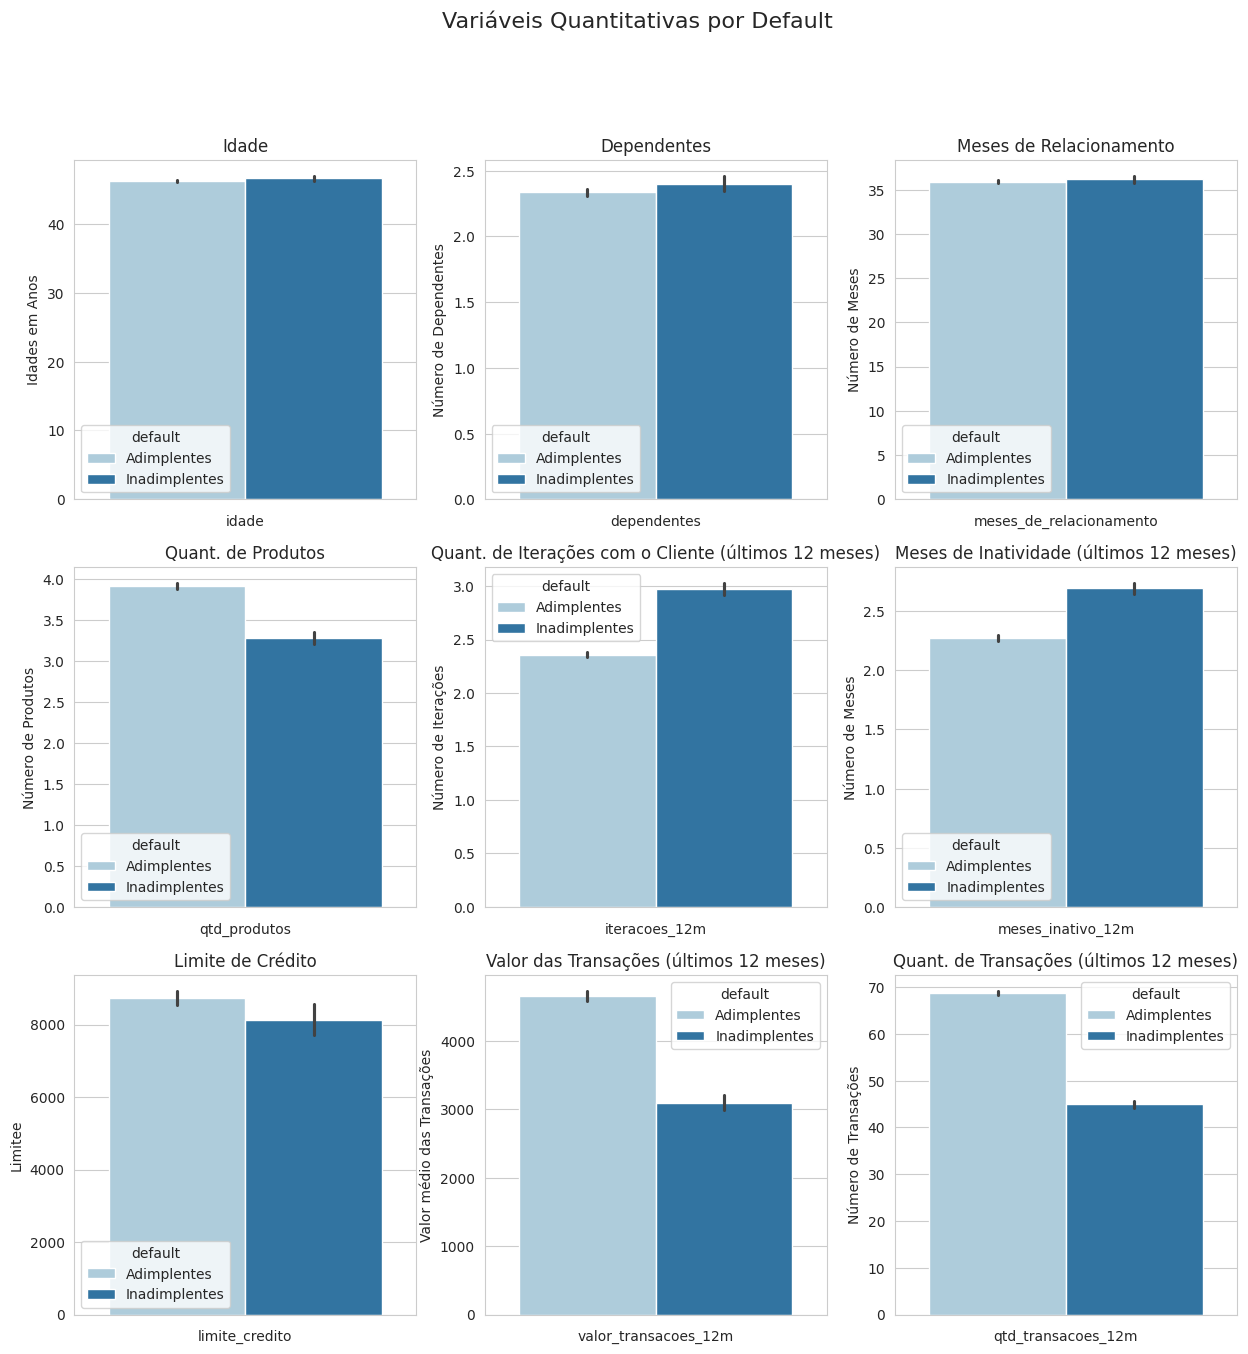

In [24]:
# Plotagem dos gráficos com as variáveis quantitativas
sns.set_style('whitegrid')

figura, eixos = plt.subplots(3,3, figsize=(15,15))

plt.suptitle('Variáveis Quantitativas por Default', size=16)

for valores in variavveis_para_grafico:
  grafico_barras_quantitativo(**valores)

# plt.savefig("variaveis_quantitativas_2024-02-09.png", dpi=300, bbox_inches='tight', )
plt.show()

### Conclusão 1

Algumas das variáveis quantitativas parecem não ser importantes para explicar a variável dependente de default. Adimplentes e inadimplentes tem a pouca variação na média de *idade*, no *número de dependentes* e no *número de meses que são clientes* da instituição.

<br>
Já as varíaveis abaixo, parecem ser diferentes entre clientes adimplentes e inadimplentes.

- *Quantidade de produtos adquiridos*
  
  Adimplentes adquirem **mais** produtos que inadimplentes

- *Quantidade de iterações da instituição com o cliente (12 meses)*
  
  A instituições iterage **menos** com adimplentes do que com inadimplentes

- *Meses de inatividade do cliente (12 meses)*
  
  Adimplentes são **menos** ativos na instituição do que inadimplentes

- *Valor das transações (12 meses)*
  
  Adimplentes transacionaram **mais** do que inadimplentes

- *Quantidade de transações (12 meses)*
  
  Adimplentes transacionaram **em maior montante** do que inadimplentes

<br>
Uma variável que mostra um comportamento limitrofe é a de *Limite de Crédito* recebido pelo cliente, onde o adimplentes tem menor *limite de crédito* que inadimplentes, porém essa diferença não é clara.


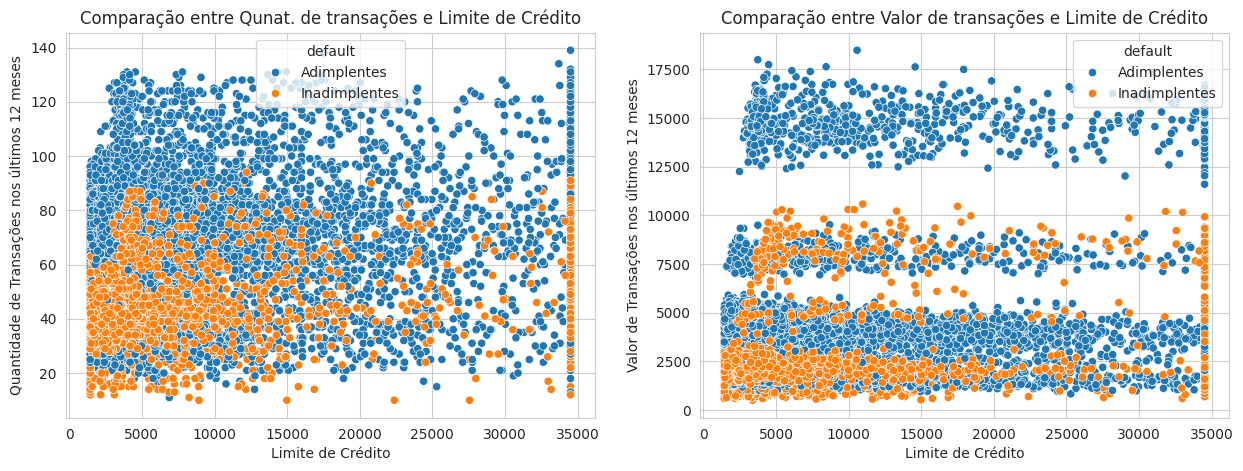

In [25]:
# Gráficos de dispersão para analise de duas variáveis
figura, eixos = plt.subplots(1,2, figsize=(15,5))

f = sns.scatterplot(
    x='limite_credito',
    y='qtd_transacoes_12m',
    hue=df['default'].apply(lambda x: 'Inadimplentes' if x else 'Adimplentes'),
    data=df,
    ax=eixos[0]
)
f.set(
    title="Comparação entre Qunat. de transações e Limite de Crédito",
    xlabel="Limite de Crédito",
    ylabel="Quantidade de Transações nos últimos 12 meses",
)

f = sns.scatterplot(
    x='limite_credito',
    y='valor_transacoes_12m',
    hue=df['default'].apply(lambda x: 'Inadimplentes' if x else 'Adimplentes'),
    data=df,
    ax=eixos[1]
)
f.set(
    title="Comparação entre Valor de transações e Limite de Crédito",
    xlabel="Limite de Crédito",
    ylabel="Valor de Transações nos últimos 12 meses",
)

plt.show()

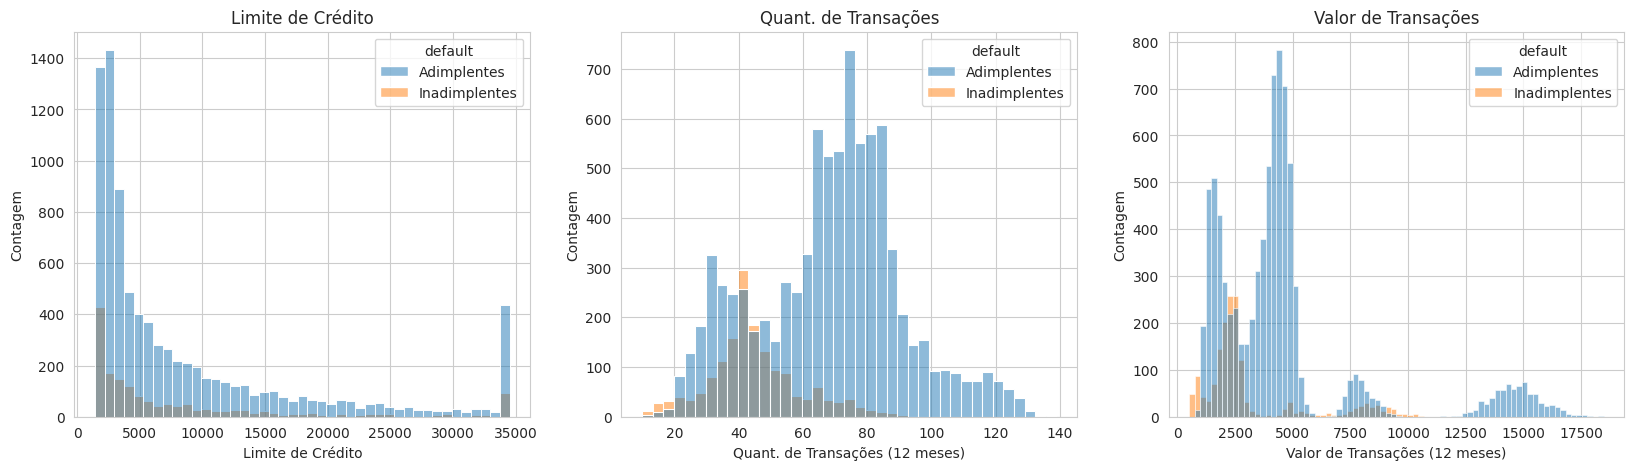

In [26]:
# Histogramas relacionando as variáveis de interesse
figura, eixos = plt.subplots(1,3, figsize=(20,5))

f = sns.histplot(
    x='limite_credito',
    hue=df['default'].apply(lambda x: 'Inadimplentes' if x else 'Adimplentes'),
    data=df,
    ax=eixos[0]
)
f.set(
    title="Limite de Crédito",
    xlabel="Limite de Crédito",
    ylabel="Contagem",
)

f = sns.histplot(
    x='qtd_transacoes_12m',
    hue=df['default'].apply(lambda x: 'Inadimplentes' if x else 'Adimplentes'),
    data=df,
    ax=eixos[1]
)
f.set(
    title="Quant. de Transações",
    xlabel="Quant. de Transações (12 meses)",
    ylabel="Contagem",
)

f = sns.histplot(
    x='valor_transacoes_12m',
    hue=df['default'].apply(lambda x: 'Inadimplentes' if x else 'Adimplentes'),
    data=df,
    ax=eixos[2]
)
f.set(
    title="Valor de Transações",
    xlabel="Valor de Transações (12 meses)",
    ylabel="Contagem",
)

plt.show()

### Conclusão 2

Apesar de observarmos que muitos clientes que transacionam mais e em maiores valores são adimplentes, isso não se relaciona com o limite de crédito.

<br>
Clientes inadimplentes possuem um limite de crédito semelhante aos adimplentes, mesmo transacionando menos e em menor valores.

## 3.2 Variáveis Qualitativas

In [27]:
# Variáveis qualitativas
df.iloc[:,1:].select_dtypes(exclude=include).describe().T

,count,unique,top,freq
default,10127,2,False,8500
sexo,10127,2,F,5358
escolaridade,10127,5,mestrado,3711
estado_civil,10127,3,casado,5056
salario_anual,10127,5,menos que $40K,4004
tipo_cartao,10127,4,blue,9436


É indicado pela LGPD que alguns dados são “sensíveis”, que são os que revelam origem racial ou étnica, convicções religiosas ou filosóficas, opiniões políticas, filiação sindical, questões genéticas, biométricas e sobre a saúde ou a vida sexual de uma pessoa.

Assim, no nosso conjunto de dados, vamos excluir sexo, como indicado.


In [28]:
del df['sexo']
# Novas variáveis qualitativas, retirando sexo.
df.iloc[:,1:].select_dtypes(exclude=include).describe().T

,count,unique,top,freq
default,10127,2,False,8500
escolaridade,10127,5,mestrado,3711
estado_civil,10127,3,casado,5056
salario_anual,10127,5,menos que $40K,4004
tipo_cartao,10127,4,blue,9436


In [29]:
def formata_titulo(valor: str) -> str:
  '''
    Função que remove o underline do nome das colunas e converte a primeira
    letra em maiúscula
    :param valor (str): Nome da coluna.
    :return valor (str): Nome da coluna editada.
  '''
  valor = valor.replace("_", " ")
  valor = valor.title()
  return valor

In [30]:
def melt_df(df: pd.DataFrame, coluna: str) -> pd.DataFrame:
  '''
    Função que modifica a extrutura da DataFrame, usando o método pd.melt,
    colocando em evidência uma variável de interesse.
    :param df (pd.DataFrame): DataFrame para edição.
    :param coluna (str): Variável para ser colocada em evidência.
    :return df_coluna_melted (pd.DataFrame): DataFrame modificada
  '''
  # Calculando a frequência na variável de interesse para inadimplentes
  coluna_adimplentes = df[df['default'] == True][coluna].value_counts(
                                                                  normalize=True
                                                                )

  # Calculando a frequência na variável de interesse para adimplentes
  coluna_inadimplentes  = df[df['default'] == False][coluna].value_counts(
                                                                  normalize=True
                                                                )

  # Unindo as frequências e editando a DataFrame
  df_coluna = pd.concat([coluna_adimplentes, coluna_inadimplentes], axis=1)
  df_coluna.index = df_coluna.index.str.title()
  df_coluna.reset_index(inplace=True)
  df_coluna.columns = ['Coluna', 'Adimplentes','Inadimplentes']

  # Colocando com pd.melt a variável de interesse em destaque
  df_coluna_melted = df_coluna.melt(id_vars='Coluna').rename(columns=str.title)
  df_coluna_melted.columns = [formata_titulo(coluna), 'Default','Valores']

  return df_coluna_melted

In [31]:
def grafico_barras_qualitativo(
    df: pd.DataFrame,
    coluna: str,
    lin: int,
    col: int
  ):
  '''
    Função que instância um gráfico de barras padronizado;
    :param df (pd.DataFrame): DataFrame para ser plotada.
    :param coluna (str): Variável de interesse.
    :param lin (int): Linha do eixo do subplot.
    :param col (int): Coluna do eixo do subplot.
    :return f (plt.axis): Retorna um eixo de uma figura com subplotes
  '''
  # Plotagem do gráfico de barras
  f = sns.barplot(
      palette="Paired",
      x=formata_titulo(coluna),
      y='Valores',
      hue='Default',
      data=melt_df(df, coluna),
      ax=eixos[lin][col]
  )

  # Edição dos elementos do gráfico
  f.set(
    title=formata_titulo(coluna),
    ylabel='Frequência',
    xlabel=formata_titulo(coluna),
  )

  f.tick_params(axis='x', labelrotation = 45)
  return f

In [32]:
# Armazenando o nome das colunas de variáveis qualitativas
colunas = df.iloc[:,2:].select_dtypes(exclude=include).columns
colunas

Index(['escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao'], dtype='object')

In [33]:
# Lista com dicionários contendo as informações para serem inseridas no gráfico
variavveis_para_grafico = [
    {
        "df": df,
        "coluna": colunas[1],
        "lin": 0,
        "col": 0,
    },
    {
        "df": df,
        "coluna": colunas[3],
        "lin": 0,
        "col": 1,
    },
    {
        "df": df,
        "coluna": colunas[0],
        "lin": 1,
        "col": 0,
    },
    {
        "df": df,
        "coluna": colunas[2],
        "lin": 1,
        "col": 1,
    },
]

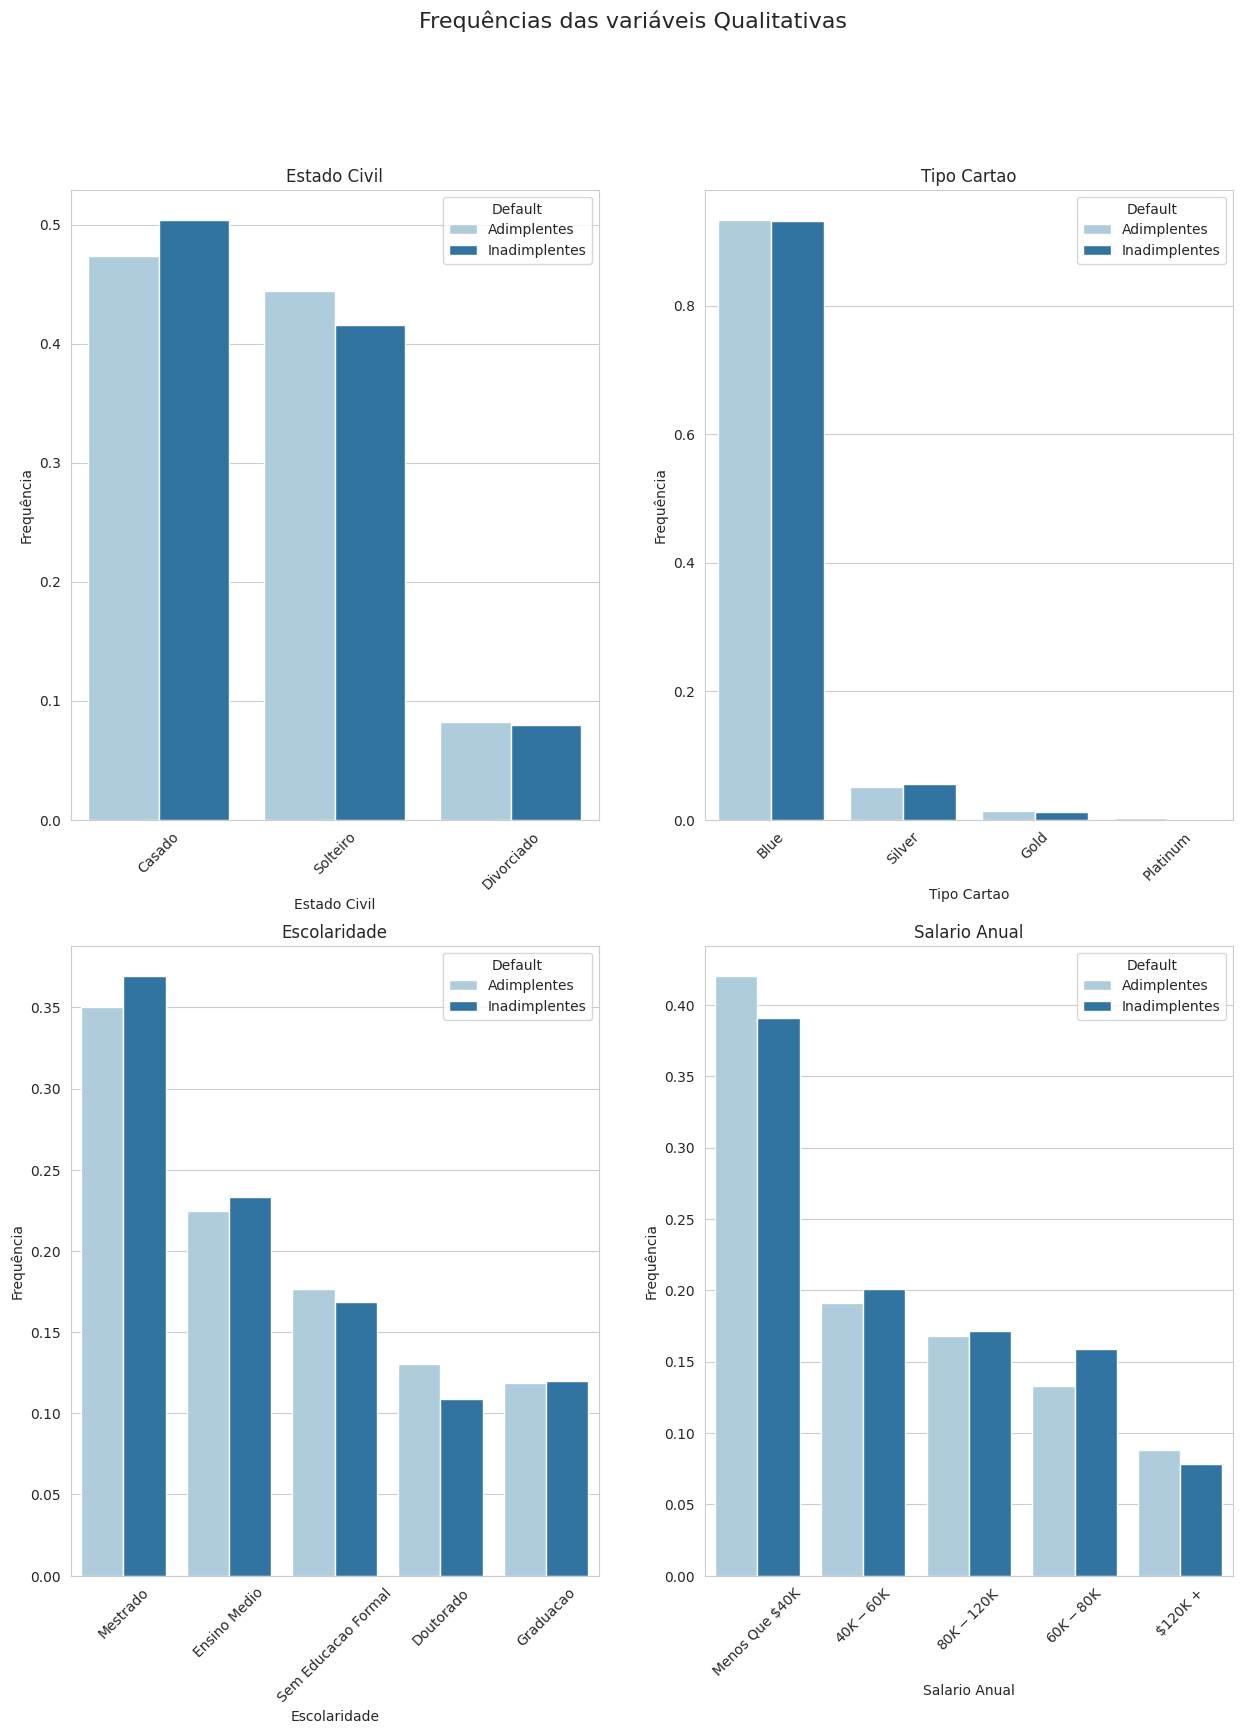

In [34]:
# Plotagem dos gráficos com as variáveis quantitativas
figura, eixos = plt.subplots(2,2, figsize=(15,18))

plt.suptitle('Frequências das variáveis Qualitativas', size=16)

for parametros in variavveis_para_grafico:
  grafico_barras_qualitativo(**parametros)

plt.show()

As variáveis como escolaridade e salário anual parecem ter maior relação com a variável dependente default.

<br>
Vamos abalisar as frequências relativas dessas e sua relação com o total.

In [35]:
def razao(df: pd.DataFrame) -> None:
  '''
    Função que calcula a frequência relativa da variável dependente default em
    uma DataFrame.
    :param df (ps.DataFrame): DataFrame para se obter a razão de default.
  '''
  adimplente, inadimplente = df['default'].value_counts(normalize=True).values
  razao = round(adimplente/inadimplente, 2)

  print(f"Adimplente: {adimplente*100:.2f}%")
  print(f"Inadimplente: {inadimplente*100:.2f}%")

  print(f"Razão: {razao}")

In [36]:
# Razão de default no conjunto total de dados
razao(df)

Adimplente: 83.93%
Inadimplente: 16.07%
Razão: 5.22


In [37]:
# Razão de default dos clientes com Doutorado
razao(df[df['escolaridade'] == "doutorado"])

Adimplente: 81.39%
Inadimplente: 18.61%
Razão: 4.37


In [38]:
# Razão de default dos clientes com menos de $40K de salário anual
razao(df[df['salario_anual'] == "menos que $40K"])

Adimplente: 82.92%
Inadimplente: 17.08%
Razão: 4.85


In [39]:
# Razão de default dos clientes com salário anual entre $60K - $80K
razao(df[df['salario_anual'] == "$60K - $80K"])

Adimplente: 86.20%
Inadimplente: 13.80%
Razão: 6.25


### Conclusão 1

Observa-se que, das variáveis qualitativas, as com maior variação entre adimplmentes e inadimplentes foram:

- Escolaridade
- Salario Anual

Para o conjunto total de dados, a razão de default é de **5,22** adimplentes para cada inadimplentes.


Escolaridade:

Para clientes com Doutorado foi menor, razão de default de **4,27** adimplentes para cada inadimplentes.



Salário Anual:
Para clientes que ganham menos de 40K foi menor, razão de default de **4,86** adimplentes para cada inadimplentes.

Para clientes que ganham entre 60K e 80K foi maior, razão de default de **6,3** adimplentes para cada inadimplentes.

In [40]:
def grafico_barras_quantitativo(
    df: pd.DataFrame,
    y: str,
    linha: int,
    title: str,
    xlabel: str,
    ylabel: str,
  ):
  '''
    Gera uma imagem de gráfico de barras.
    :param df (pd.DataFrame): DataFrame contendo o conjunto de dados
    :param y (str): Nome da coluna para o eixo y
    :param coluna (int): Coordenada da coluna no subplote.
    :param title (str): Título do gráfico no subplote.
    :param xlabel (str): Legenda no eixo x do gráfico no subplote.
    :param ylabel (str): Legenda no eixo y do gráfico no subplote.
    :return f (plt.axis): Retorna um eixo de uma figura com subplotes
  '''
  f = sns.barplot(
      palette="Paired",
      y=y,
      hue=df['default'].apply(lambda x: 'Inadimplentes' if x else 'Adimplentes'),
      data=df,
      ax=eixos[linha]
  )

  f.set(
      title=title,
      xlabel=xlabel,
      ylabel=ylabel,
  )
  return f

In [41]:
# Lista com dicionários contendo as informações para serem inseridas no gráfico
variavveis_para_grafico = [
    {
      "df":    df[df['salario_anual'] == "$60K - $80K"],
      'y':     colunas_quantitativas[6],
      'linha':  0,
      'title': 'Limite de Crédito',
      'xlabel': colunas_quantitativas[6],
      'ylabel': 'Limitee'
    },
    {
      "df":    df[df['salario_anual'] == "$60K - $80K"],
      'y':     colunas_quantitativas[7],
      'linha':  1,
      'title': 'Valor das Transações (últimos 12 meses)',
      'xlabel': colunas_quantitativas[7],
      'ylabel': 'Valor médio das Transações'
    },
    {
      "df":    df[df['salario_anual'] == "$60K - $80K"],
      'y':     colunas_quantitativas[8],
      'linha':  2,
      'title': 'Quant. de Transações (últimos 12 meses)',
      'xlabel': colunas_quantitativas[8],
      'ylabel': 'Número de Transações'
    }
]

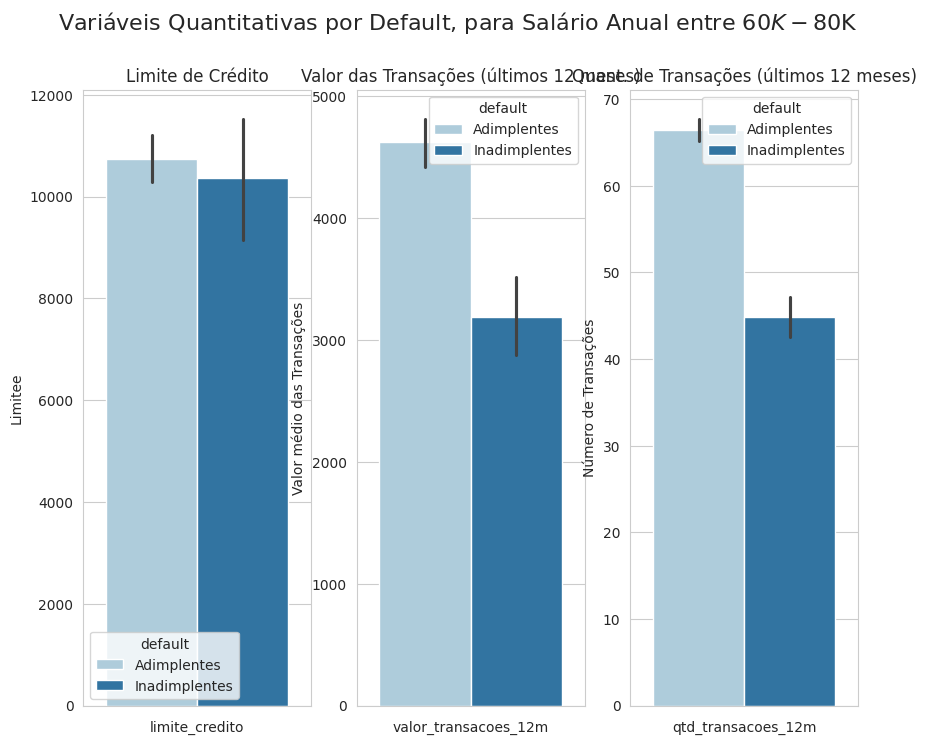

In [42]:
# Plotagem dos gráficos com as variáveis quantitativas
figura, eixos = plt.subplots(1,3, figsize=(10,8))

plt.suptitle(
  'Variáveis Quantitativas por Default, para Salário Anual entre $60K - $80K',
  size=16
)

for valores in variavveis_para_grafico:
  grafico_barras_quantitativo(**valores)

plt.show()

### Conclusão 2

Ao analisar o conjunto de clientes com maior razão de default, com Salário Anual entre 60K e 80K, não observamos mudança significativa no padrão de:

- Limite de Crédito;
- Valor de Transações (12 mese);
- Quantidade de Transações (12 mese);

Apesar dessas quatro variáveis parecerem importantes para explicar a variável dependente, esse subconunto de dados não parece ter diferença significativa em relação ao todo.

# 4 Conclusão Final

a) Foi observado que no conjunto de dados, alguns valores estavam faltando e esses foram trabalhados antes da análise exploratória;

b) A relação entre clientes em default (adiplentes e inadimplentes) parece estar alterada (para mais ou menos) em 6 das __ variáveis analisadas.

- *Quantidade de produtos adquiridos*;
- *Quantidade de iterações da instituição com o cliente (12 meses)*;
- *Meses de inatividade do cliente (12 meses)*;
- *Valor das transações (12 meses)*;
- *Quantidade de transações (12 meses)*;
- *Escolaridade*;
- *Salário Anual*;

A variável *Limite de Crédito* podem também ter relação com a *Quantidade e Valor das Transações*; uma vez que um grupo de clientes inadimplentes tem o mesmo limite e efetua as mesmas transações que os adimplentes.


c) Parace haver pouca relação entre as variáveis quantitativas e as qualitativas, no que diz respeito a análise da variável dependente.